In [1]:
# ------------------------------------------define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from src.utils.Tensorflow_helper import choose_gpu_by_id
# ------------------------------------------define GPU id/s to use
GPU_IDS = '0,1'
GPUS = choose_gpu_by_id(GPU_IDS)
print(GPUS)
# ------------------------------------------jupyter magic config
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# ------------------------------------------ import helpers
# this should import glob, os, and many other standard libs
from src.utils.Notebook_imports import *
from tensorflow.python.client import device_lib
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
# local imports
from src.utils.Utils_io import Console_and_file_logger, init_config
from src.visualization.Visualize import show_2D_or_3D, show_phases, show_phases_transpose
from src.utils.KerasCallbacks import get_callbacks
from src.data.Dataset import get_trainings_files

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/dynamic-cmr-models
['/gpu:0', '/gpu:1']


# Get the phases as onehot-vector from an ACDC filename

100
/mnt/ssd/data/acdc/original/all/patient001/patient001_4d.nii.gz
/mnt/ssd/data/acdc/original/all/patient001
/mnt/ssd/data/acdc/original/all/patient001/Info.cfg
{'ED': '1', 'ES': '12', 'Group': 'DCM', 'Height': '184.0', 'NbFrame': '30', 'Weight': '95.0'}
ED: 1
ES: 12
length: 30
(5,)


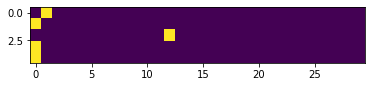

In [31]:
# list of 4D files
files_aced = sorted(glob.glob('/mnt/ssd/data/acdc/original/all/*/*4d.nii.gz'))
print(len(files_aced))
temp_f = files_aced[0]
print(temp_f)
# load cfg for one file/patient
temp_p = os.path.dirname(os.path.abspath(temp_f))
print(temp_p)
temp_cfg_f = os.path.join(temp_p, 'Info.cfg')
print(temp_cfg_f)
import json
temp_cfg=dict()
cfg_f = open(temp_cfg_f)
for l in cfg_f:
    key,value = l.split(':')
    temp_cfg[key] = value.replace('\n','').replace(' ', '')
print(temp_cfg)

# extract ED/ES timetemp
temp_ed = int(temp_cfg['ED'])
temp_es = int(temp_cfg['ES'])
temp_length = int(temp_cfg['NbFrame'])
print('ED: {}'.format(temp_ed))
print('ES: {}'.format(temp_es))
print('length: {}'.format(temp_length))
# create onehot vector, set the other phases to zero
idx = np.zeros(5)
print(idx.shape)
idx[0] = temp_ed
idx[2] = temp_es
# order of phase classes, learnt by the phase regression model
# ['ED#', 'MS#', 'ES#', 'PF#', 'MD#']]
indices = np.round(idx * 1).astype(int)
indices = np.clip(indices, a_min=0, a_max=temp_length)

onehot = np.zeros((indices.size, temp_length))
onehot[np.arange(indices.size), indices] = 1
plt.imshow(onehot)


